# Group By

Groupby operation involves some combination of splitting the object,applying a function and combining the result.
This can be used to group large amount of data and compute operations on these group.

In [21]:
import pandas as pd

In [22]:
drinks=pd.read_csv("/Users/apple/Downloads/drinks.csv")

In [23]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0.0,0,0.0,AS
1,Albania,89,132.0,54,4.9,EU
2,Algeria,25,0.0,14,0.7,AF
3,Andorra,245,138.0,312,12.4,EU
4,Angola,217,57.0,45,5.9,AF


In [24]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0.0,0,0.0,AS
1,Albania,89,132.0,54,4.9,EU
2,Algeria,25,0.0,14,0.7,AF
3,Andorra,245,138.0,312,12.4,EU
4,Angola,217,57.0,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100.0,3,7.7,SA
189,Vietnam,111,2.0,1,2.0,AS
190,Yemen,6,0.0,0,0.1,AS
191,Zambia,32,19.0,4,2.5,AF


In [25]:
drinks["continent"].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

<AxesSubplot:>

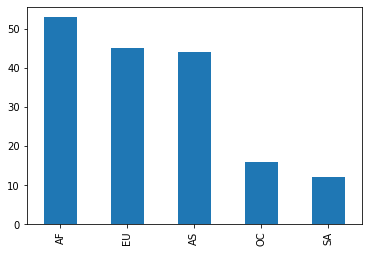

In [26]:
drinks["continent"].value_counts().plot(kind="bar")

# Which continent drinks more beer on an average?

In [27]:
drinks.groupby("continent").agg({"beer_servings":"mean","wine_servings":"max"})

,beer_servings,wine_servings
continent,,
AF,61.471698,233
AS,37.045455,123
EU,193.777778,370
OC,89.687500,212
SA,175.083333,221


In [29]:
x=drinks.groupby("continent")
x

In [8]:
drinks.groupby("continent").mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.780000,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,60.066667,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


Which continent drink minimum wine?
which continent drink max alcohol?

In [10]:
drinks.groupby("continent").agg({"wine_servings":"min"})

,wine_servings
continent,
AF,0
AS,0
EU,0
OC,0
SA,1


In [11]:
drinks.groupby("continent").agg({ "total_litres_of_pure_alcohol":"max"})

,total_litres_of_pure_alcohol
continent,
AF,9.1
AS,11.5
EU,14.4
OC,10.4
SA,8.3


In [30]:
people=pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep="|",index_col="user_id")

In [31]:
people

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In each occupation what is average age?
In each gender what is minimum age?

In [32]:
people.groupby("occupation").agg({"age":"mean"})

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [33]:
people.groupby("gender").agg({"age":"min"})

,age
gender,
F,13
M,7


In [ ]:
for each combination of occupation and gender calculate the mean age?


In [34]:
people.groupby(["occupation","gender"]).agg({"age":"mean"})

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

# Joining the data frame.

In [35]:
Div_1=pd.DataFrame({
"roll_no":["1","2","3","4"],
"First_name":["Alex","Alena","Jhon","Amy"],
"Last_name":["wilson","adams","gilbert","salvatore"]
})

In [36]:
Div_1

,roll_no,First_name,Last_name
0,1,Alex,wilson
1,2,Alena,adams
2,3,Jhon,gilbert
3,4,Amy,salvatore


In [37]:
Div_2=pd.DataFrame({
    "roll_no":["6","7","8"],
    "First_name":["Ram","Sita","Geeta"],
    "Last_name":["Soni","sahu","malviya"]
})

In [38]:
Div_2

,roll_no,First_name,Last_name
0,6,Ram,Soni
1,7,Sita,sahu
2,8,Geeta,malviya


In [39]:
#row_wise joining (Concatenation)

final=pd.concat([Div_1,Div_2],axis=0)

In [40]:
final

,roll_no,First_name,Last_name
0,1,Alex,wilson
1,2,Alena,adams
2,3,Jhon,gilbert
3,4,Amy,salvatore
0,6,Ram,Soni
1,7,Sita,sahu
2,8,Geeta,malviya


In [43]:
final.reset_index()  #it is not allowing to delete the index (col)

,index,roll_no,First_name,Last_name
0,0,1,Alex,wilson
1,1,2,Alena,adams
2,2,3,Jhon,gilbert
3,3,4,Amy,salvatore
4,0,6,Ram,Soni
5,1,7,Sita,sahu
6,2,8,Geeta,malviya


In [45]:
English=pd.DataFrame({
   "roll_no":["1","2","3","4","5"],
    "First_name":["Ram","Sita","Geeta","Megha","Mani"],
    "english":[65,76,78,67,89]
})

In [46]:
English

,roll_no,First_name,english
0,1,Ram,65
1,2,Sita,76
2,3,Geeta,78
3,4,Megha,67
4,5,Mani,89


In [69]:
Maths=pd.DataFrame({
    "roll_no":["1","2","3","4","6"],
    "First_name":["Ram","Sita","Geeta","Megha","Divyangi"],
    "Maths":[45,67,89,34,90]
})

In [70]:
Maths

,roll_no,First_name,Maths
0,1,Ram,45
1,2,Sita,67
2,3,Geeta,89
3,4,Megha,34
4,6,Divyangi,90


In [71]:
final2=pd.concat([English,Maths],axis=1)

In [72]:
final2

,roll_no,First_name,english,roll_no,First_name,Maths
0,1,Ram,65,1,Ram,45
1,2,Sita,76,2,Sita,67
2,3,Geeta,78,3,Geeta,89
3,4,Megha,67,4,Megha,34
4,5,Mani,89,6,Divyangi,90


Parameters which we need to keep on mind while merging the two tables in python.

Merge:
    
    1.left dataframe(1st)
    2.Right dataframe (2nd)
    3.on (primary key)
    4.how? are different types of joins

In [76]:
main=pd.merge(English,Maths,on=["roll_no","First_name"])

In [77]:
main


,roll_no,First_name,english,Maths
0,1,Ram,65,45
1,2,Sita,76,67
2,3,Geeta,78,89
3,4,Megha,67,34


In [78]:
main=pd.merge(English,Maths,on=["roll_no","First_name"],how="outer")

In [79]:
main

,roll_no,First_name,english,Maths
0,1,Ram,65.0,45.0
1,2,Sita,76.0,67.0
2,3,Geeta,78.0,89.0
3,4,Megha,67.0,34.0
4,5,Mani,89.0,NaN
5,6,Divyangi,NaN,90.0
